In [4]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics
#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [124]:
#For Accuracy
from sklearn import tree

In [125]:
#For Linear Regression 
%matplotlib inline

In [126]:
#For Linear Regression
plt.rcParams["figure.figsize"] = (20.0, 10.0)

In [187]:
#import dataset
df = pd.read_csv('Astha.1.csv')

In [165]:
print (df.head())

     AGE     REGION  GENDER       BMI  BLOOD GROUP   medical history  \
0  18-19  Faridabad    Male    25-29.9         AB+                 0   
1  20-21      Noida  Female  18.5-24.9          A+                 0   
2  18-19      Delhi  Female      <18.5          O+                 0   
3  18-19      Noida    Male    25-29.9          O+                 0   
4  20-21      Delhi  Female  18.5-24.9          B+                 0   

   SYMPTOMS MEDICATIOS  DIAGNOSIS  
0         0          0          0  
1         0          0          0  
2         0          0          0  
3         0          0          0  
4         0          0          0  


In [6]:
ds = pd.read_csv('sir1.1.csv')

In [7]:
ds.head()

,medical history,symptoms,diagnosis,blood group,bmi,age,gender
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Male
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Male
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Male
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Male
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Male


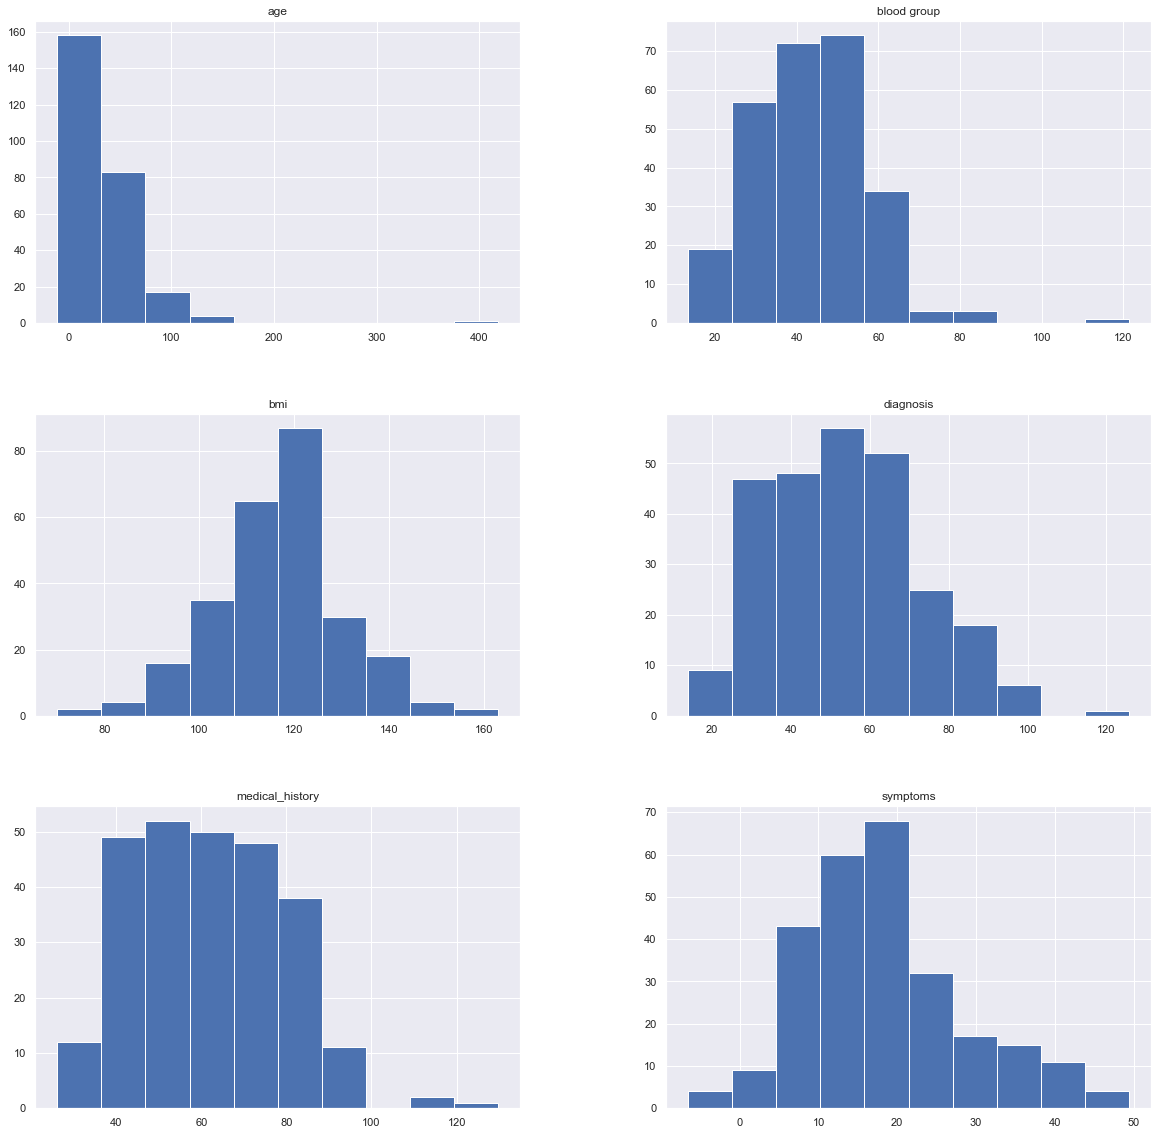

In [131]:
s = ds.hist(figsize = (20,20))

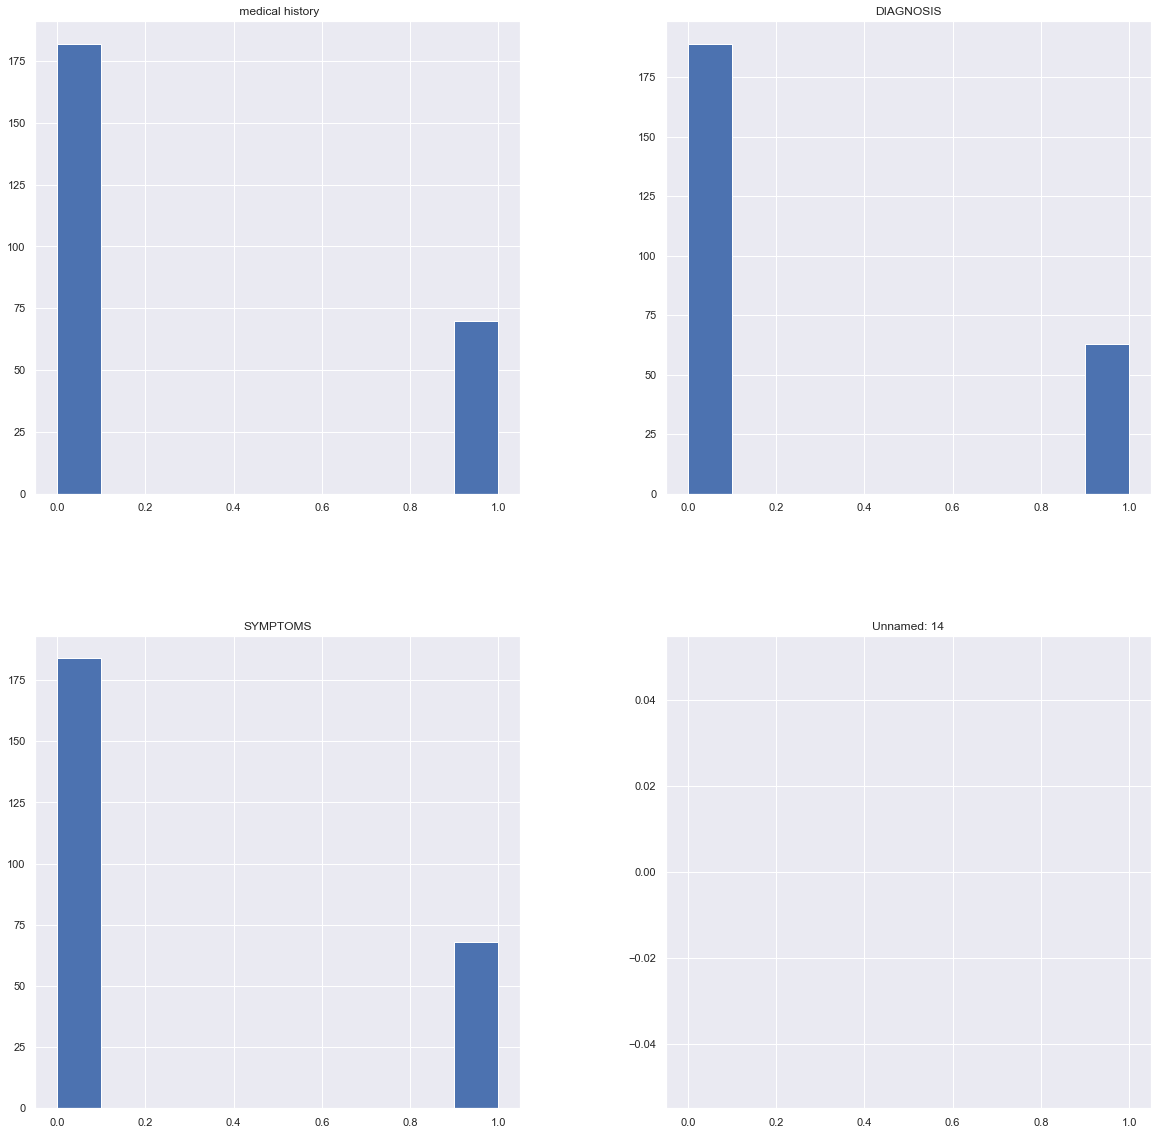

In [132]:
f = df.hist (figsize = (20,20))

In [8]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

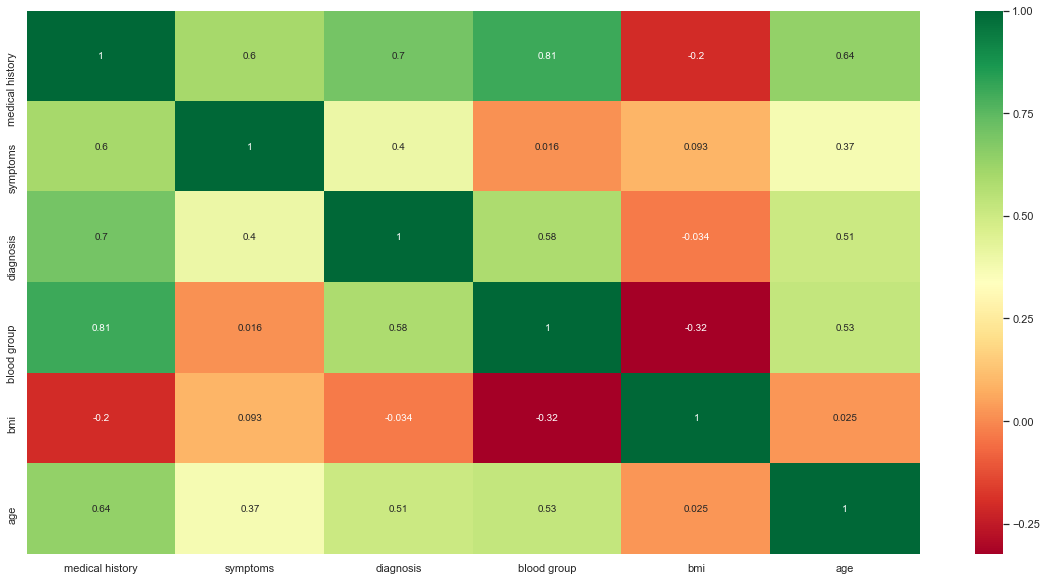

In [96]:
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

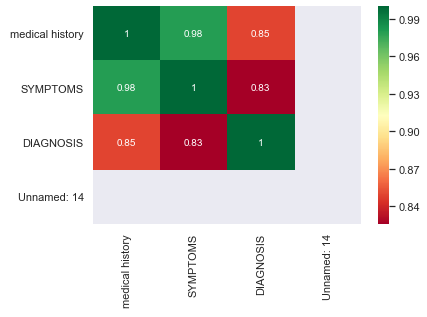

In [10]:
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

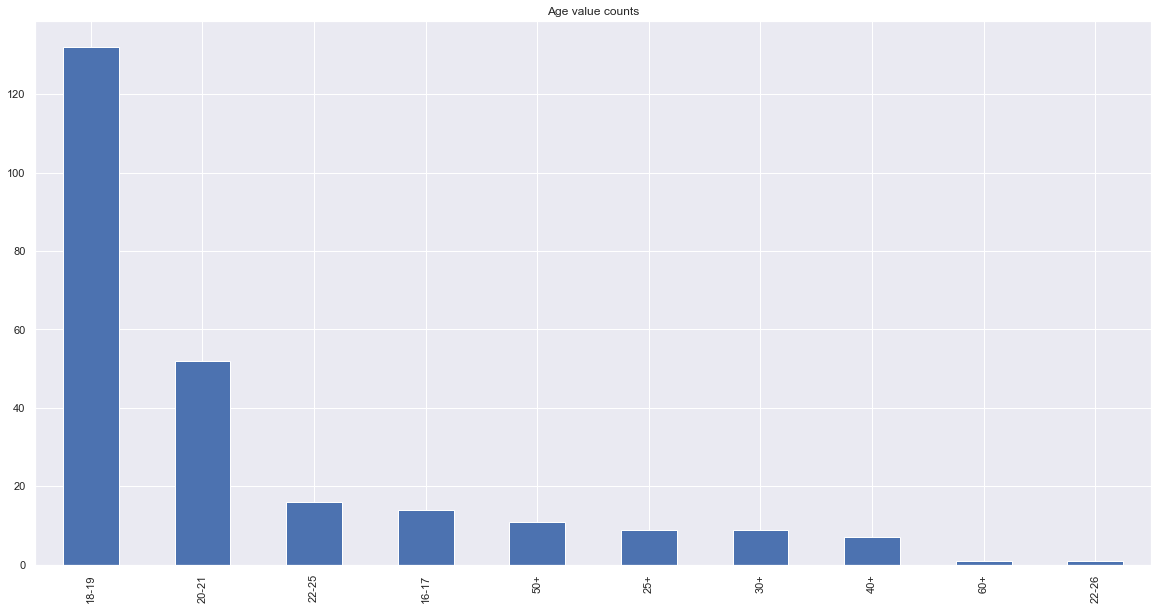

In [163]:
plt.show()
value_counts = df['AGE'].value_counts()
value_counts.plot.bar(title = 'Age value counts')

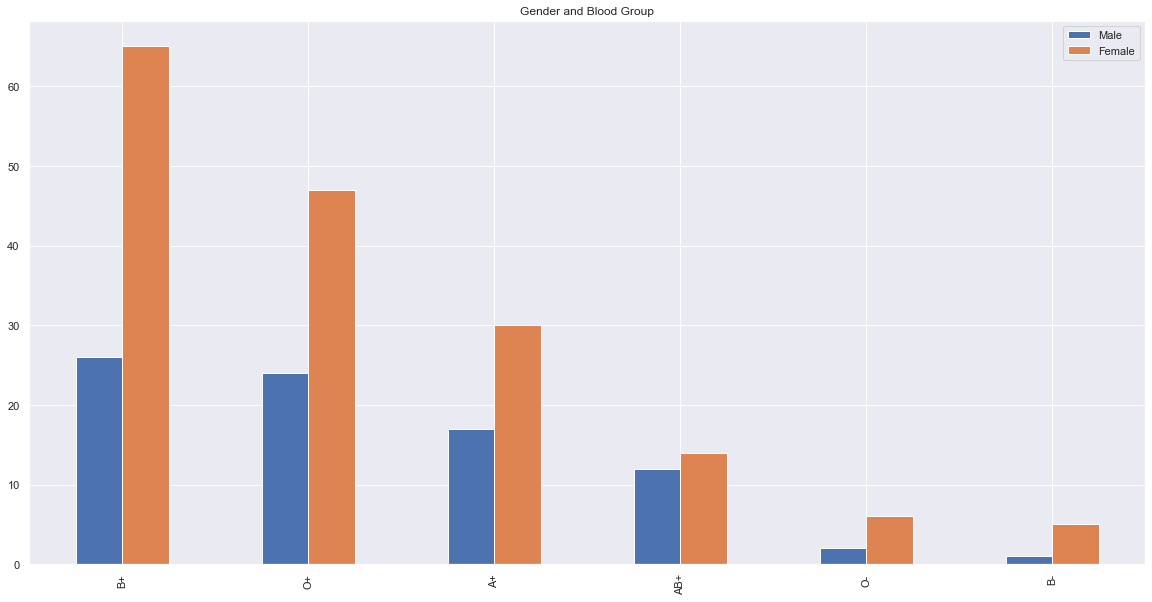

In [170]:
j_df = pd.DataFrame()
j_df['Male'] = df[df['GENDER'] == 'Male']['BLOOD GROUP'].value_counts()
j_df['Female'] = df[df['GENDER'] == 'Female']['BLOOD GROUP'].value_counts()
j_df.plot.bar(title = 'Gender and Blood Group')

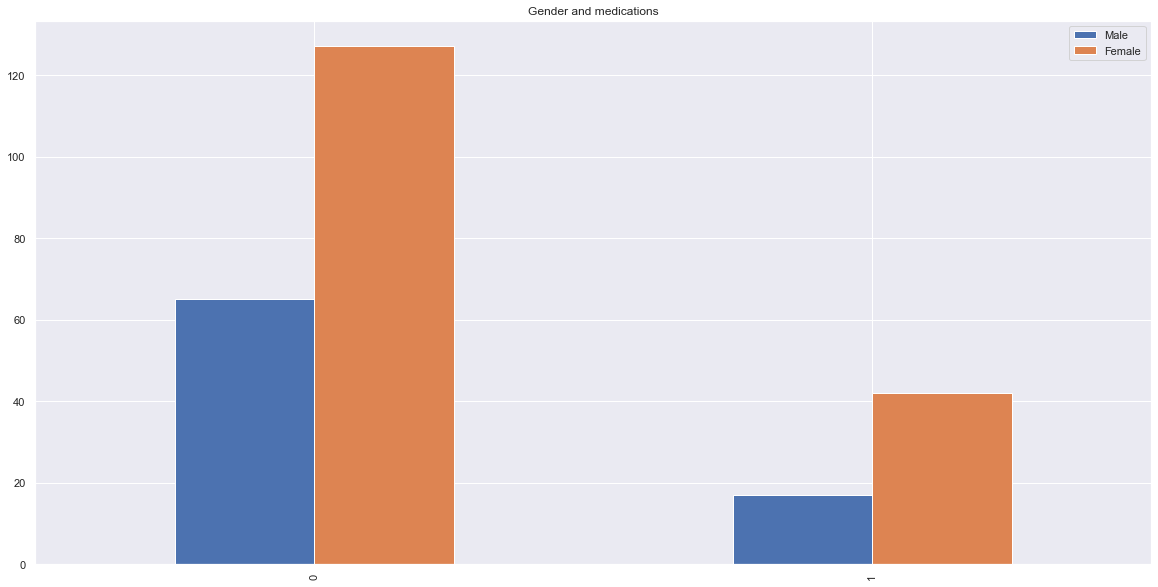

In [169]:
j_df = pd.DataFrame()
j_df['Male'] = df[df['GENDER'] == 'Male']['MEDICATIOS'].value_counts()
j_df['Female'] = df[df['GENDER'] == 'Female']['MEDICATIOS'].value_counts()
j_df.plot.bar(title = 'Gender and medications')


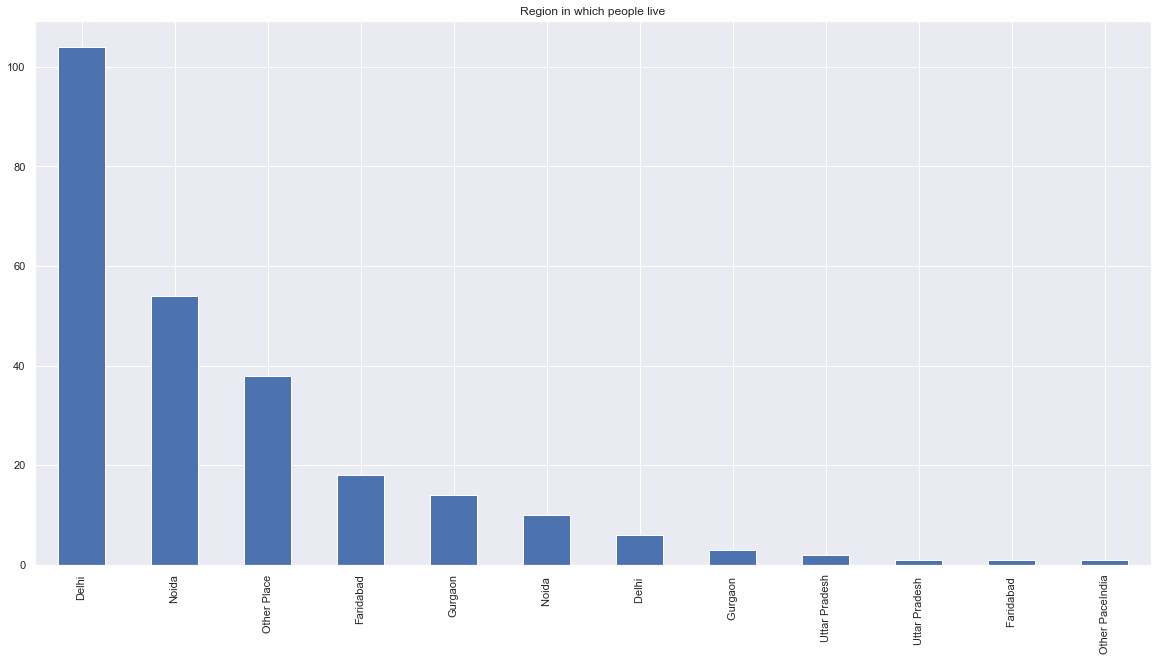

In [188]:
plt.show()
value_counts_2 = df['REGION'].value_counts()
value_counts_2.plot.bar(title = 'Region in which people live')

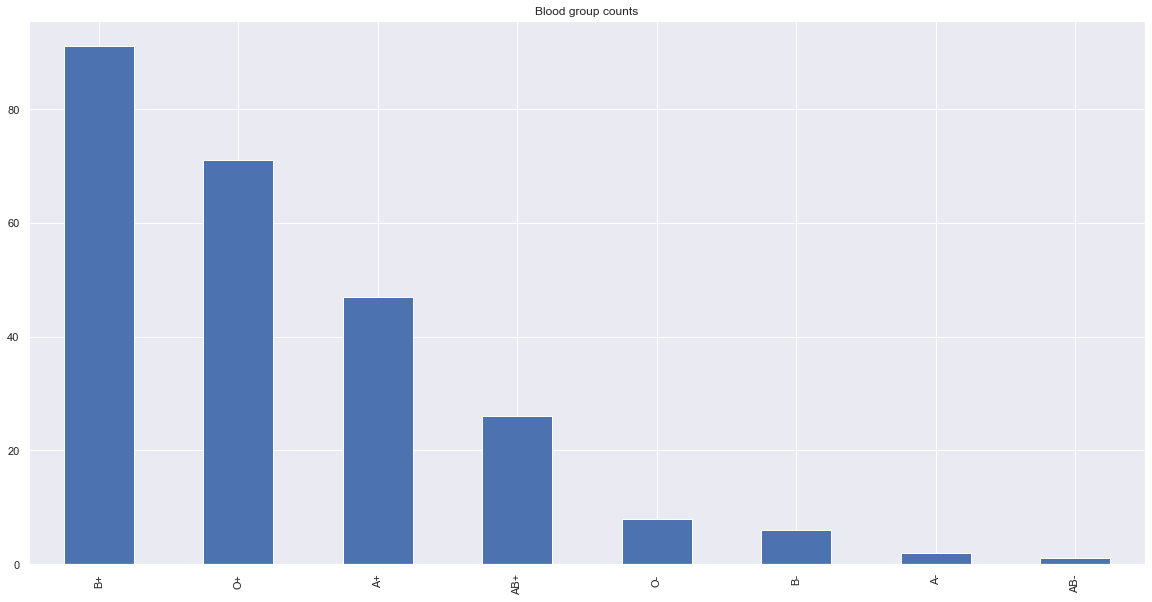

In [167]:
plt.show()
value_counts_1 = df['BLOOD GROUP'].value_counts()
value_counts_1.plot.bar(title = 'Blood group counts')

In [182]:
df.head()

,AGE,REGION,GENDER,BMI,BLOOD GROUP,medical history,SYMPTOMS,MEDICATIOS,DIAGNOSIS
0,18-19,Faridabad,Male,25-29.9,AB+,0,0,0,0
1,20-21,Noida,Female,18.5-24.9,A+,0,0,0,0
2,18-19,Delhi,Female,<18.5,O+,0,0,0,0
3,18-19,Noida,Male,25-29.9,O+,0,0,0,0
4,20-21,Delhi,Female,18.5-24.9,B+,0,0,0,0


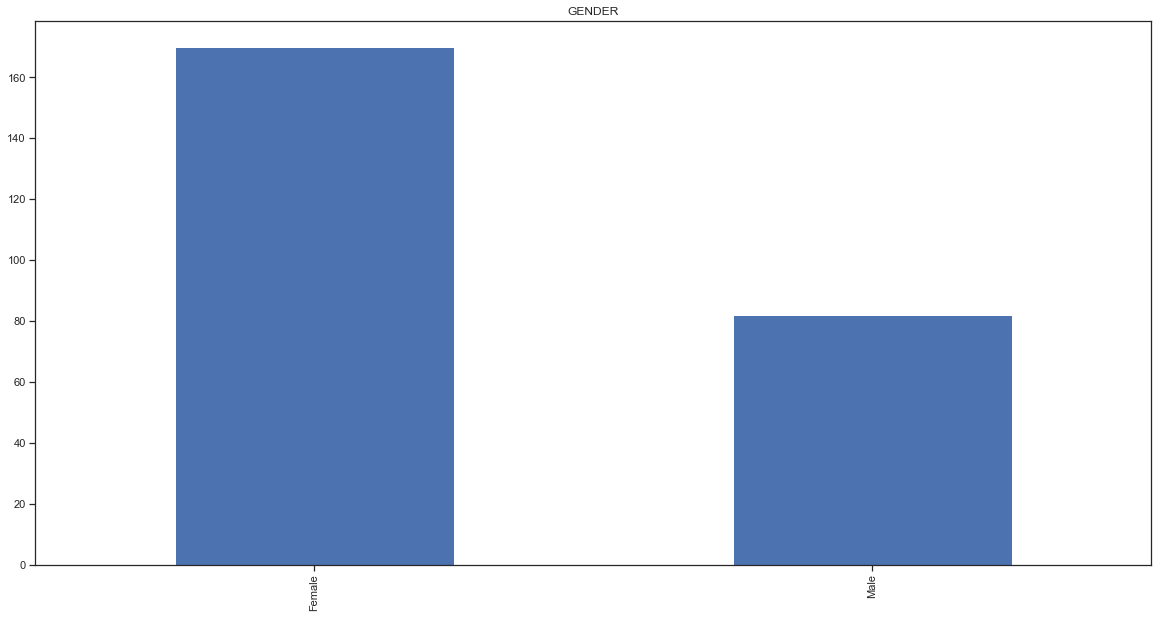

In [217]:
plt.show()
value_counts_3 = df['GENDER'].value_counts()
value_counts_3.plot.bar(title = 'GENDER')

In [172]:
#import dataset
df = pd.read_csv('Astha.1.csv')
df.head()


,AGE,REGION,GENDER,BMI,BLOOD GROUP,medical history,SYMPTOMS,MEDICATIOS,DIAGNOSIS
0,18-19,Faridabad,Male,25-29.9,AB+,0,0,0,0
1,20-21,Noida,Female,18.5-24.9,A+,0,0,0,0
2,18-19,Delhi,Female,<18.5,O+,0,0,0,0
3,18-19,Noida,Male,25-29.9,O+,0,0,0,0
4,20-21,Delhi,Female,18.5-24.9,B+,0,0,0,0


In [173]:
ds = pd.read_csv('sir1.1.csv')
ds.head()

,medical_history,symptoms,diagnosis,blood group,bmi,age,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [174]:
ds['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [175]:
# you split class as abnormal and normal
A = ds[ds["class"] == "Abnormal"]
N = ds[ds["class"] == "Normal"]

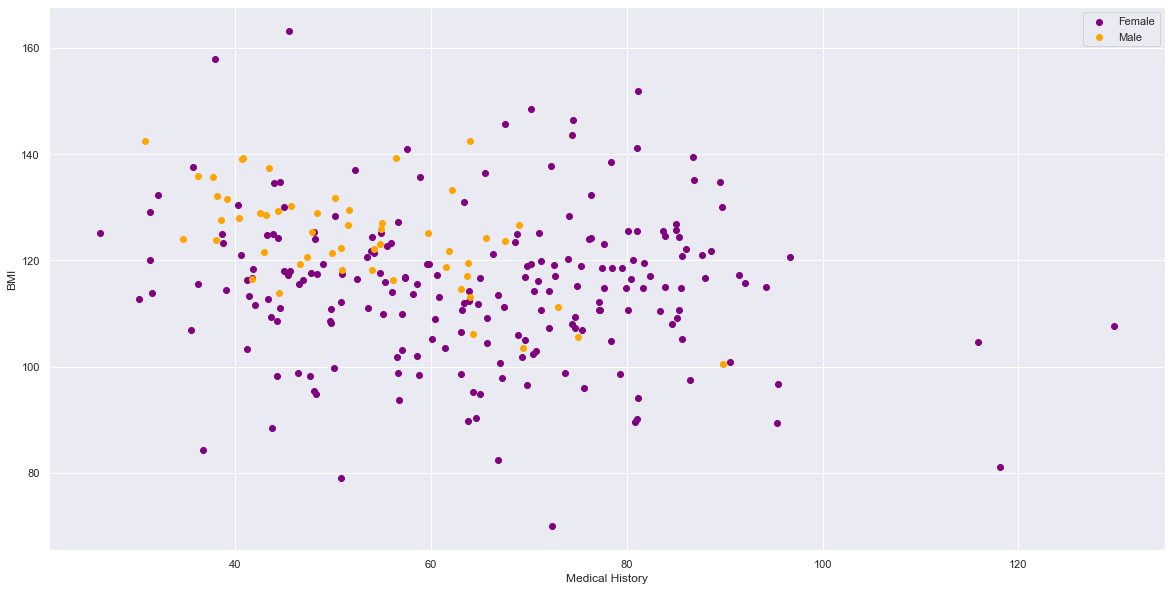

In [177]:
plt.scatter(A.medical_history, A.bmi, color = "purple", label = "Female",alpha = 1.0)
plt.scatter(N.medical_history, N.bmi, color = "orange", label = "Male", alpha = 1.0)
plt.xlabel("Medical History")
plt.ylabel("BMI")
plt.legend()
plt.show()

In [106]:
# abnormal and normal are string. So you transform integer or float.
ds["class"] = [0 if each == "Abnormal" else 1 for each in ds["class"]]

In [107]:
# determine feature and feature class.
y = ds["class"].values
x_data = ds.drop(["class"], axis=1)

In [108]:
# normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
# (x-min(x))/(max(x)-min(x))

In [109]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [110]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("{} nın score: {}".format(3,knn.score(x_test,y_test)))

3 nın score: 0.7735849056603774


In [111]:
# find the most appropriate k value
score_list = []
for each in range(1,15):
 knn2 = KNeighborsClassifier(n_neighbors=each)
 knn2.fit(x_train, y_train)
 score_list.append(knn2.score(x_test,y_test))

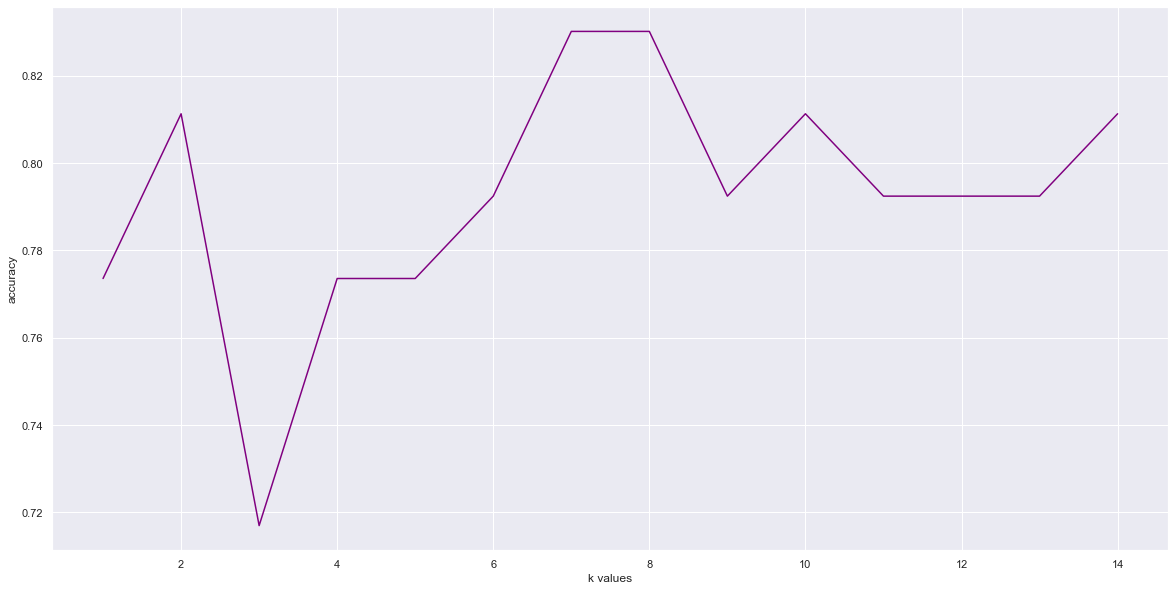

In [178]:
plt.plot(range(1,15),score_list,color="purple")
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [86]:
#Data accuracy
features = [[140, 1], [130, 1], [135, 1], [145, 1], [150, 2], [160, 2], [170, 2], [165, 2]]
labels = [1, 1, 1, 1, 2, 2, 2, 2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)
clf.predict([[150, 2]])
from sklearn.metrics import accuracy_score
y_pred=[1,1,2,1,2,1,2,1,1,1,2]
y_true=[1,1,2,1,2,1,2,1,1,2,1]
accuracy_score(y_pred,y_true)

0.8181818181818182

In [11]:
#import dataset
df = pd.read_csv('Astha.1.csv')
df.head()

,AGE,REGION,GENDER,BMI,BLOOD GROUP,medical history,SYMPTOMS,MEDICATIOS,DIAGNOSIS
0,18-19,Faridabad,Male,25-29.9,AB+,0,0,0,0
1,20-21,Noida,Female,18.5-24.9,A+,0,0,0,0
2,18-19,Delhi,Female,<18.5,O+,0,0,0,0
3,18-19,Noida,Male,25-29.9,O+,0,0,0,0
4,20-21,Delhi,Female,18.5-24.9,B+,0,0,0,0


In [12]:
ds.head()

,medical history,symptoms,diagnosis,blood group,bmi,age,gender
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Male
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Male
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Male
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Male
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Male


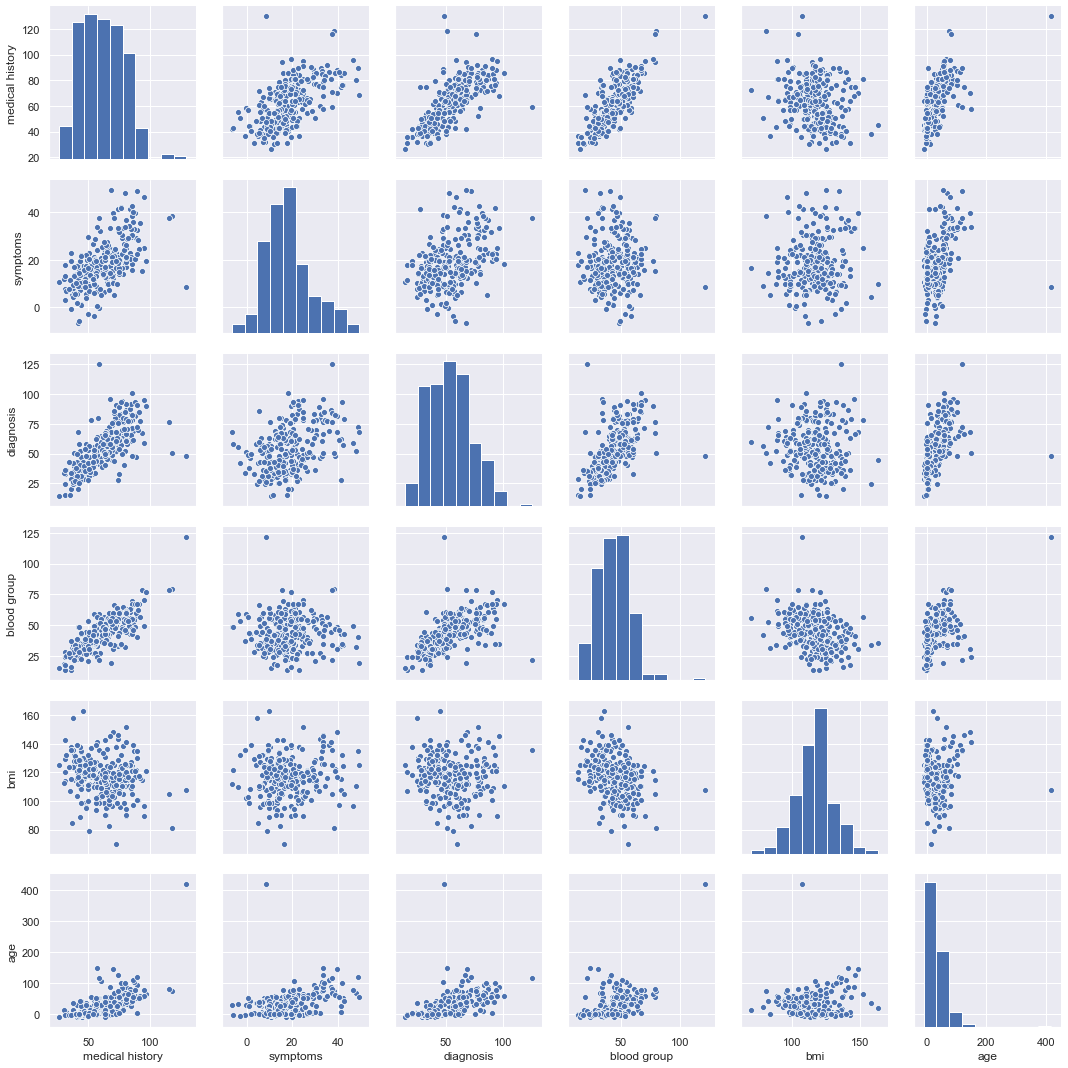

In [9]:
sns.pairplot(ds)

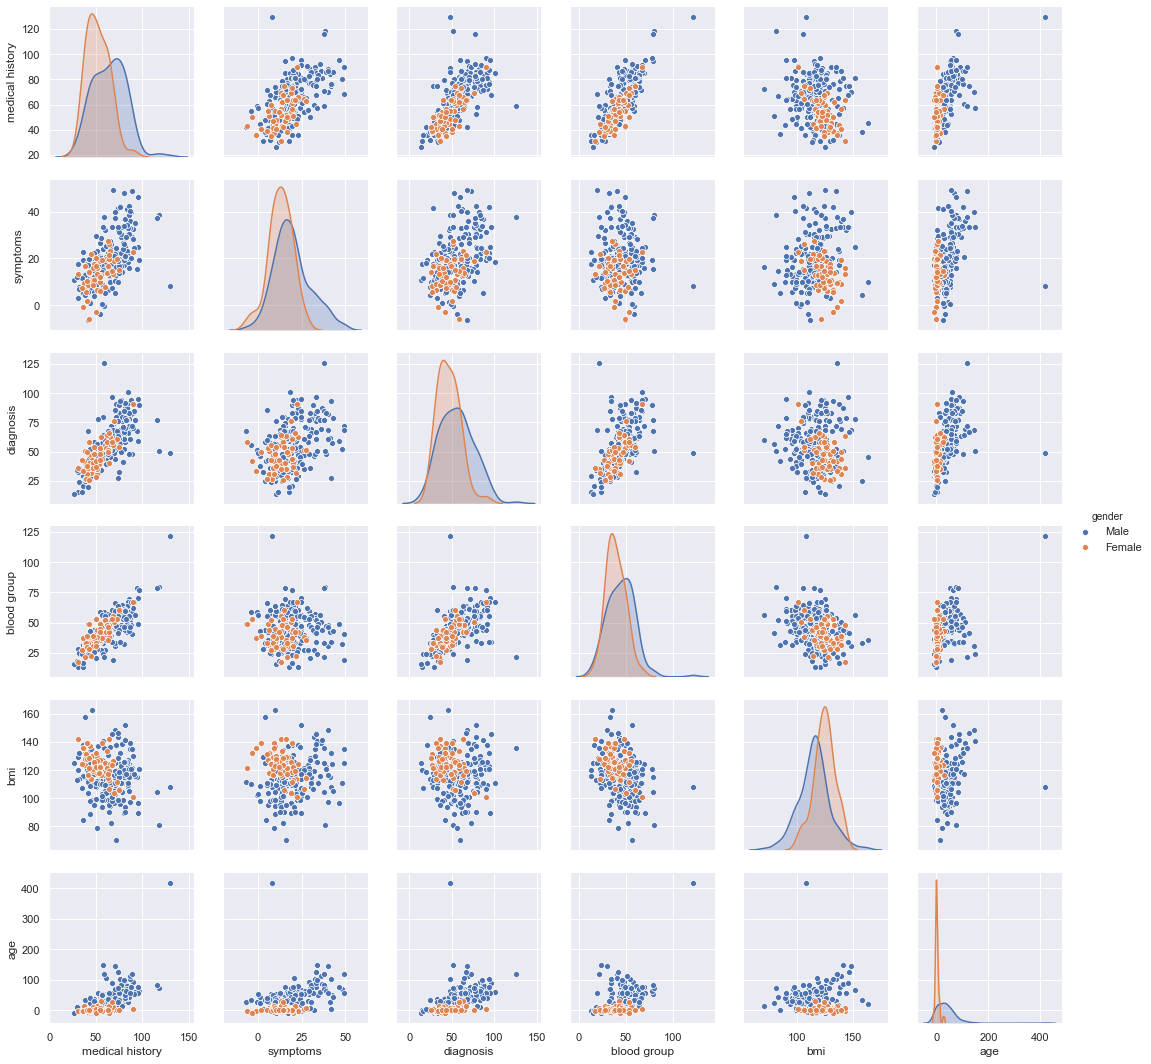

In [8]:
sns.pairplot(ds, hue = 'gender')
